In [33]:

import math
import copy
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pickle
import os
import json

## <font color='teal'>The Data from the Word Document</font>

```
Nausea and Vomiting Pathway CH V1-updated

Has your nausea lasted longer than 24 hours or have you had any vomiting?
Yes О Schedule a same day appointment. Notify the infusion room of a possible patient add-on for hydration. If the patient refuses to be seen notify the physician and schedule a follow up call in 24 hours. The system should take you to 3.
No  О  The system should take you to 2.

2- Triage Nurse Instructions: 
0 Make sure the patient has antiemetics and verify how they are taking it. If the patient does not have a prescription, notify the physician.  Advise the patient on fluid intake (ginger ale), eat small frequent meals throughout the day. Avoid spicy, fatty or salty foods.  Tell the patient to call us back if they begin to feel worse; we want them to avoid having to go to the E.R. Call to check on the patient in 24 hours.  The system should take you to 3.

3- What was the patient outcome?
     (Dropdown)
•    I scheduled a same day appointment. The system should take you to 4
•    I scheduled a next day appointment. The system should take you to 4
•    I scheduled an appointment in 2 or more days. The system should take you to 4
•    I scheduled a STAT appointment. The system should take you to 4
•    I scheduled a follow up call. The system should take you to 5
•    I managed the patient over the phone. The system should take you to 5
•    I followed the 911 protocol and notified the admitting/on-call physician. The system should take you to 5
•    The patient refused ambulance through 911. Patient is going to the ER via private automobile. The system should take you to 5
•    I notified the hospice nurse. The system should take you to 5
•    Made an appointment/referral to an outside provider. The system should take you to 5
•    The patient refused to be seen The system should take you to 5

4- If an appointment was scheduled: What would the patient have done if they could not have been seen in the office? 
     (Dropdown)
-The patient would have gone to an urgent care center. The system should take you to 5.
-The patient would have gone to the emergency room. The system should take you to 5.
-The patient would have stayed home and called the next morning. The system should take you to 5.
-The patient would have called and asked to speak to the doctor on call. The system should take you to 5.
-The patient would have called their other doctor (like PCP) for care. The system should take you to 5.
-Other:________________________________ The system should take you to 5.

5- 0 Document any necessary information, complete the encounter and save. . (The user completes the encounter.)
```

### Represent this information as a directed graph, visualize the graph, and output the graph in json format

In [34]:
MDG = nx.MultiDiGraph(name="Nausea and Vomiting Pathway CH V1")


In [35]:
mdgnodes = ["""Has the patient's nausea lasted longer than 24 hours or have they had any vomiting?""",
            """Triage Nurse Instructions: Make sure the patient has antiemetics and determine if 
            they are taking it correctly.
            If the patient does not have a prescription, notify the 
            physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent 
            meals throughout the day. Advise the patient to avoid spicy, fatty or salty foods.
            Ask the patient to
            call back if they begin to feel worse; we want them to avoid 
            unecessary visits to the
            E.R. Call to check on the patient in 24 hours.""",
            """What was the patient outcome?""",
            """If an appointment was scheduled: What would the patient have done if they could
            not have been seen in the office?""",
            """Document any necessary information, complete the encounter and save."""]

mdgnodes = [' '.join(m.split()) for m in mdgnodes]

for m in mdgnodes:
    print(m)

Has the patient's nausea lasted longer than 24 hours or have they had any vomiting?
Triage Nurse Instructions: Make sure the patient has antiemetics and determine if they are taking it correctly. If the patient does not have a prescription, notify the physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent meals throughout the day. Advise the patient to avoid spicy, fatty or salty foods. Ask the patient to call back if they begin to feel worse; we want them to avoid unecessary visits to the E.R. Call to check on the patient in 24 hours.
What was the patient outcome?
If an appointment was scheduled: What would the patient have done if they could not have been seen in the office?
Document any necessary information, complete the encounter and save.


### <font color='teal'>Add the nodes (questions)</font>

In [36]:
nodedict = dict(list(enumerate(mdgnodes)))
for k in nodedict.keys():
    MDG.add_node(k, label=nodedict[k])


In [37]:
for n in MDG.nodes(data=True):
    print(n)

(0, {'label': "Has the patient's nausea lasted longer than 24 hours or have they had any vomiting?"})
(1, {'label': 'Triage Nurse Instructions: Make sure the patient has antiemetics and determine if they are taking it correctly. If the patient does not have a prescription, notify the physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent meals throughout the day. Advise the patient to avoid spicy, fatty or salty foods. Ask the patient to call back if they begin to feel worse; we want them to avoid unecessary visits to the E.R. Call to check on the patient in 24 hours.'})
(2, {'label': 'What was the patient outcome?'})
(3, {'label': 'If an appointment was scheduled: What would the patient have done if they could not have been seen in the office?'})
(4, {'label': 'Document any necessary information, complete the encounter and save.'})


### <font color='teal'>Add the edges (the possible paths between questions)</font> 

In [38]:

mdgedges = [(0,2,{'label':"""Yes Schedule a same day appointment. Notify the infusion room
of a possible patient add-on for hydration. If the patient refuses to be seen notify the 
physician and schedule a follow up call in 24hours."""}),
            (0,1,{'label':'No'}),
            (1,2,{'label':"""Make sure the patient has antiemetics and determine if 
            they are taking it correctly.
            If the patient does not have a prescription, notify the 
            physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent 
            meals throughout the day. 
            Advise the patient to avoid spicy, fatty or salty foods.
            Ask the patient to
            call back if they begin to feel worse; we want
            them to avoid visits to the
            E.R. Call to check on the patient in 24 hours."""}),
            (2,3,{'label':"""I scheduled a same day appointment."""}),
            (2,3,{'label':"""I scheduled a next day appointment."""}),
            (2,3,{'label':"""I scheduled an appointment in 2 or more days."""}),
            (2,3,{'label':"""I scheuled a STAT appointment."""}),
            (2,4,{'label':"""I scheduled a follow up call."""}),
            (2,4,{'label':"""I managed the patient over the phone."""}),
            (2,4,{'label':"""I followed the 911 protocol and notified the admitting/on-call 
            physician."""}),
            (2,4,{'label':"""The patient refused ambulance through 911. The patient is going to 
            the ER via private automobile."""}),
            (2,4,{'label':"""I notified the hospice nurse."""}),
            (2,4,{'label':"""I Made an appointment/referral to an outside provider."""}),
            (2,4,{'label':"""The patient refused to be seen."""}),
            (3,4,{'label':"""The patient would have gone to an urgent care center."""}),
            (3,4,{'label':"""The patient would have gone to the emergency room."""}),
            (3,4,{'label':"""The patient would have stayed home and called the next morning."""}),
            (3,4,{'label':"""The patient would have called and asked to speak to the doctor on 
            call."""}),
            (3,4,{'label':"""The patient would have called another doctor 
            (e.g. PCP) for care."""}),
            (3,4,{'label':"""Other"""})]

In [39]:
MDG.add_edges_from(mdgedges)
for e in MDG.edges(data=True):
    e[2]['label'] = ' '.join(e[2]['label'].split())
    print(e)

(0, 1, {'label': 'No'})
(0, 2, {'label': 'Yes Schedule a same day appointment. Notify the infusion room of a possible patient add-on for hydration. If the patient refuses to be seen notify the physician and schedule a follow up call in 24hours.'})
(1, 2, {'label': 'Make sure the patient has antiemetics and determine if they are taking it correctly. If the patient does not have a prescription, notify the physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent meals throughout the day. Advise the patient to avoid spicy, fatty or salty foods. Ask the patient to call back if they begin to feel worse; we want them to avoid visits to the E.R. Call to check on the patient in 24 hours.'})
(2, 3, {'label': 'I scheduled a same day appointment.'})
(2, 3, {'label': 'I scheduled a next day appointment.'})
(2, 3, {'label': 'I scheduled an appointment in 2 or more days.'})
(2, 3, {'label': 'I scheuled a STAT appointment.'})
(2, 4, {'label': 'I scheduled a follow up call.'

It can be useful for testing purposes to know all of the possible paths through a triage pathway.
With this graph representation you can easily find all the possible paths (simple for this relatively small pathway, but his method is very useful for larger pathways).

In [40]:
def start_to_leaf(Dg,n,m):
    """Takes a graph Dg and a node n, and shows all of paths leading
    from n down to a leaf node m."""
    paths = nx.all_simple_paths(Dg,n,m)
    pathslist = list(paths)
    pathshash = [tuple(i) for i in pathslist]
    paths = list(set(pathshash))
    print("There are ", len(paths), " paths connecting ", n, " to ", m)
    for path in paths:   # need to get the edges with their data, not just the nodes
        textpath = [Dg.nodes(data=True)[p][1]['label'] for p in path]
        print(path, textpath)
        for i in range(len(path)-1):
            huh = Dg.get_edge_data(path[i], path[i+1])
            for j in range(len(huh)):
                print(path[i], path[i+1], huh[j])
        print("------------------------------------------------\n")

In [41]:
def print_paths(Dg):
    """Takes a directed graph Dg as input and calls start_to_leaf
    for all of the start-end pairs (0, the set of nodes with 0 
    out-degree)."""
    for n in Dg.nodes():
        if Dg.out_degree(n) == 0:
            start_to_leaf(Dg,0,n)
            print("----------------------------\n")

In [42]:
print_paths(MDG)

There are  4  paths connecting  0  to  4
(0, 1, 2, 4) ["Has the patient's nausea lasted longer than 24 hours or have they had any vomiting?", 'Triage Nurse Instructions: Make sure the patient has antiemetics and determine if they are taking it correctly. If the patient does not have a prescription, notify the physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent meals throughout the day. Advise the patient to avoid spicy, fatty or salty foods. Ask the patient to call back if they begin to feel worse; we want them to avoid unecessary visits to the E.R. Call to check on the patient in 24 hours.', 'What was the patient outcome?', 'Document any necessary information, complete the encounter and save.']
0 1 {'label': 'No'}
1 2 {'label': 'Make sure the patient has antiemetics and determine if they are taking it correctly. If the patient does not have a prescription, notify the physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent m

In [43]:
from networkx.readwrite import json_graph
mdgdata = json_graph.node_link_data(MDG)
# The json.dumps() function (which means "dump string," not "dumps")
# will translate a Python value into a string of JSON-formatted data.
mdgjasonstring = json.dumps(mdgdata, indent = 4)
print(mdgjasonstring)

{
    "graph": {
        "name": "Nausea and Vomiting Pathway CH V1"
    },
    "directed": true,
    "nodes": [
        {
            "id": 0,
            "label": "Has the patient's nausea lasted longer than 24 hours or have they had any vomiting?"
        },
        {
            "id": 1,
            "label": "Triage Nurse Instructions: Make sure the patient has antiemetics and determine if they are taking it correctly. If the patient does not have a prescription, notify the physician. Advise the patient on fluid intake (ginger ale) and to eat small frequent meals throughout the day. Advise the patient to avoid spicy, fatty or salty foods. Ask the patient to call back if they begin to feel worse; we want them to avoid unecessary visits to the E.R. Call to check on the patient in 24 hours."
        },
        {
            "id": 2,
            "label": "What was the patient outcome?"
        },
        {
            "id": 3,
            "label": "If an appointment was scheduled: What

In [60]:
with open('nauseaandvomiting.json', 'w') as outfile:
    json.dump(mdgdata, outfile, indent = 4)

## <font color='teal'>Visualize the Graph</font>

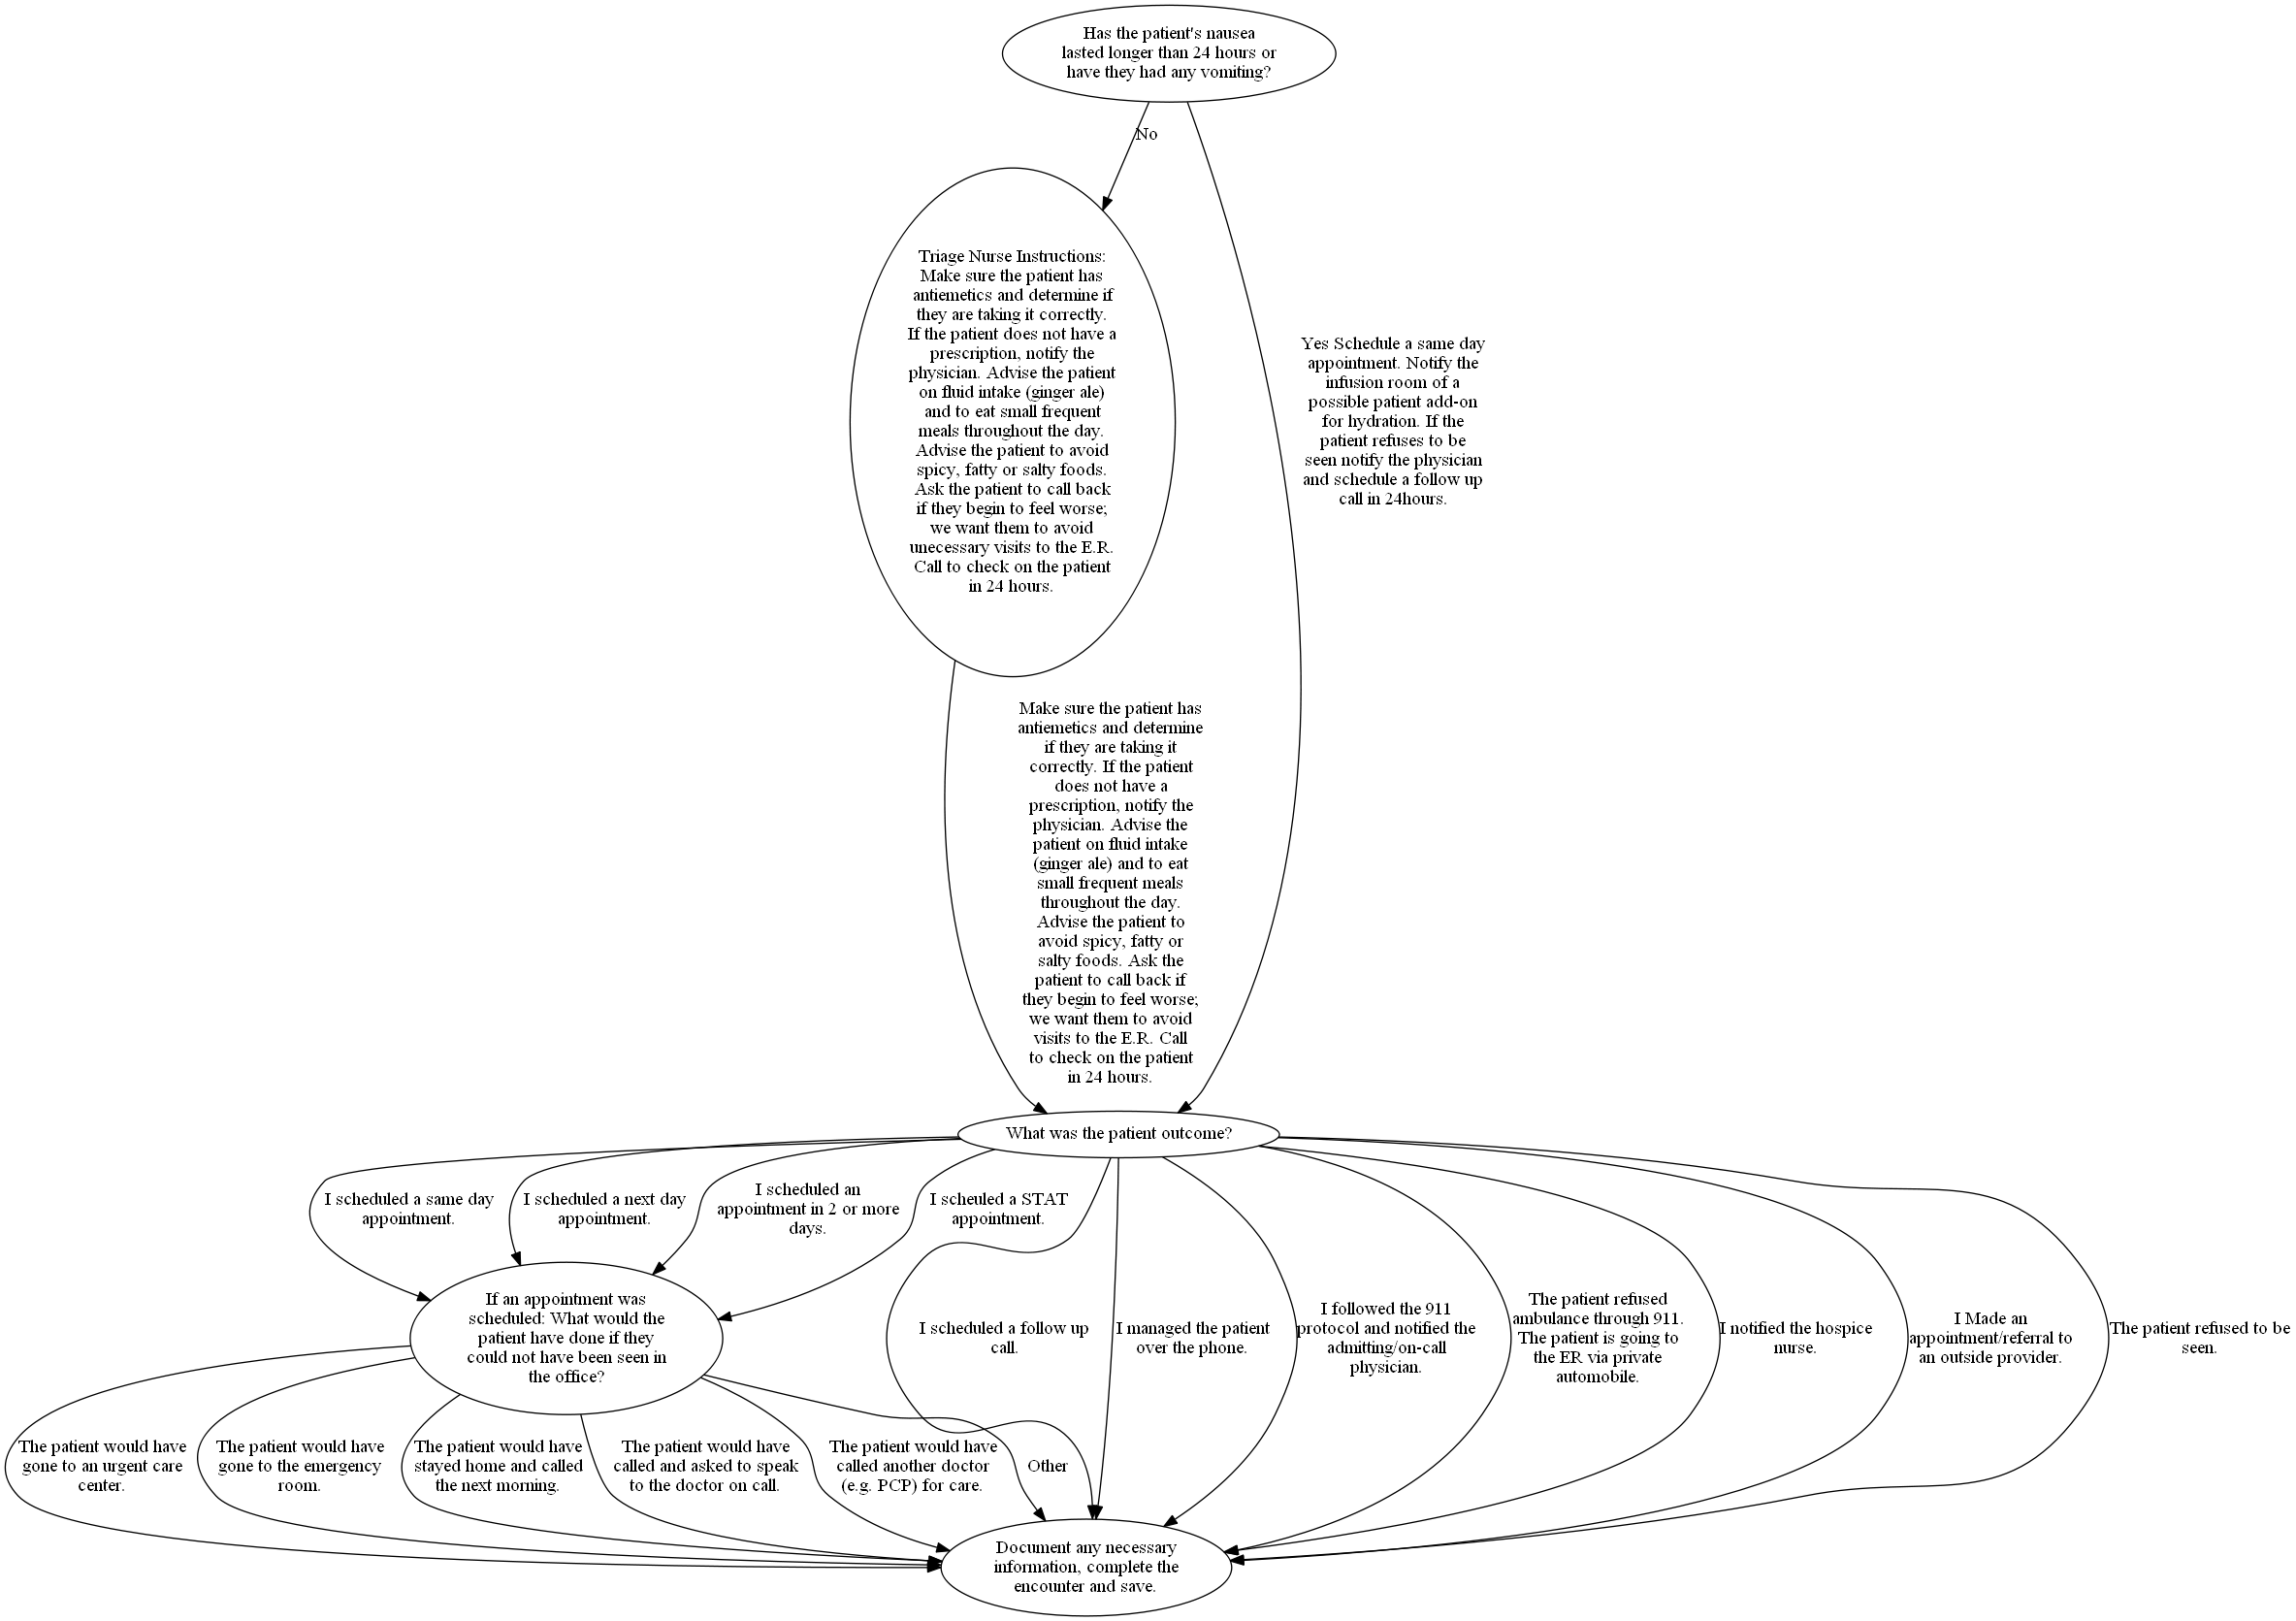

In [23]:

from IPython.display import Image
Image(filename='nauseaandvomiting.png',width=10000, height=10000,embed=True)

In [44]:
for n in MDG.nodes(data=True):
    n[1]['label'] = n[1]['label'].replace(":", "<->")
    
for e in MDG.edges(data=True):
    e[2]['label'] = e[2]['label'].replace(":", "<->")
    
import textwrap
for n in MDG.nodes(data=True):
    n[1]['label'] = textwrap.fill(n[1]['label'], width=30)
    print(n)

(0, {'label': "Has the patient's nausea\nlasted longer than 24 hours or\nhave they had any vomiting?"})
(1, {'label': 'Triage Nurse Instructions<->\nMake sure the patient has\nantiemetics and determine if\nthey are taking it correctly.\nIf the patient does not have a\nprescription, notify the\nphysician. Advise the patient\non fluid intake (ginger ale)\nand to eat small frequent\nmeals throughout the day.\nAdvise the patient to avoid\nspicy, fatty or salty foods.\nAsk the patient to call back\nif they begin to feel worse;\nwe want them to avoid\nunecessary visits to the E.R.\nCall to check on the patient\nin 24 hours.'})
(2, {'label': 'What was the patient outcome?'})
(3, {'label': 'If an appointment was\nscheduled<-> What would the\npatient have done if they\ncould not have been seen in\nthe office?'})
(4, {'label': 'Document any necessary\ninformation, complete the\nencounter and save.'})


In [45]:
for e in MDG.edges(data=True):
    e[2]['label'] = textwrap.fill(e[2]['label'], width=25)
    print(e)

(0, 1, {'label': 'No'})
(0, 2, {'label': 'Yes Schedule a same day\nappointment. Notify the\ninfusion room of a\npossible patient add-on\nfor hydration. If the\npatient refuses to be\nseen notify the physician\nand schedule a follow up\ncall in 24hours.'})
(1, 2, {'label': 'Make sure the patient has\nantiemetics and determine\nif they are taking it\ncorrectly. If the patient\ndoes not have a\nprescription, notify the\nphysician. Advise the\npatient on fluid intake\n(ginger ale) and to eat\nsmall frequent meals\nthroughout the day.\nAdvise the patient to\navoid spicy, fatty or\nsalty foods. Ask the\npatient to call back if\nthey begin to feel worse;\nwe want them to avoid\nvisits to the E.R. Call\nto check on the patient\nin 24 hours.'})
(2, 3, {'label': 'I scheduled a same day\nappointment.'})
(2, 3, {'label': 'I scheduled a next day\nappointment.'})
(2, 3, {'label': 'I scheduled an\nappointment in 2 or more\ndays.'})
(2, 3, {'label': 'I scheuled a STAT\nappointment.'})
(2, 4, {'label':

In [46]:
#from networkx.drawing.nx_agraph import write_dot
#nx.write_dot(MDG, "nauseaandvomiting.dot")


#import codecs, re
#contents = codecs.open("nauseaandvomiting.dot", 
#                      encoding='utf-8').read()
#print contents

#newcontents = re.sub(r"<->","#nx.drawing.nx_agraph.write_dot(MDG, 'nausaeaandvomiting.dot'):",contents)
#print newcontents

#dot_file = open("nauseaandvomiting.dot","w")

#dot_file.write(newcontents)

#import os
 
#os.system('dot -Tpng nauseaandvomiting.dot -o nauseaandvomiting.png')



#from IPython.display import Image
#Image(filename='nauseaandvomiting.png',width=10000, height=10000)

In [47]:
from ipywidgets import interact, interactive, fixed
def f(x):
    return x

In [48]:
interact(f, x=10);

10

Can use networkx to output the graph into the GraphML format. This format can then be read by the newer graph python package
graph-tool, which can then do the plotting/visualization.

In [89]:
from networkx.readwrite import write_graphml

nx.write_graphml(MDG, 'nausaeaandvomiting.graphml')
nx.write_graphml(MDG, 'nausaeaandvomiting.gml')  # now use cytoscape

http://nbviewer.jupyter.org/github/idekerlab/py2cytoscape/blob/develop/examples/New_wrapper_api_sample.ipynb

In [77]:
with open('nauseaandvomiting.json', 'w') as outfile:
    json.dump(mdgdata, outfile, indent = 4)

In [103]:
#from networkx.readwrite import to_pydot
#from networkx.drawing.nx_agraph import write_dot
from networkx.drawing.nx_pydot import write_dot

In [104]:
write_dot(MDG, "nauseaandvomiting.dot")


#import codecs, re
#contents = codecs.open("nauseaandvomiting.dot", 
#                      encoding='utf-8').read()
#print contents

#newcontents = re.sub(r"<->","#nx.drawing.nx_agraph.write_dot(MDG, 'nausaeaandvomiting.dot'):",contents)
#print newcontents

#dot_file = open("nauseaandvomiting.dot","w")

#dot_file.write(newcontents)

import os
 
os.system('dot -Tpng nauseaandvomiting.dot -o nauseaandvomiting.png')



#from IPython.display import Image
#Image(filename='nauseaandvomiting.png',width=10000, height=10000)

0

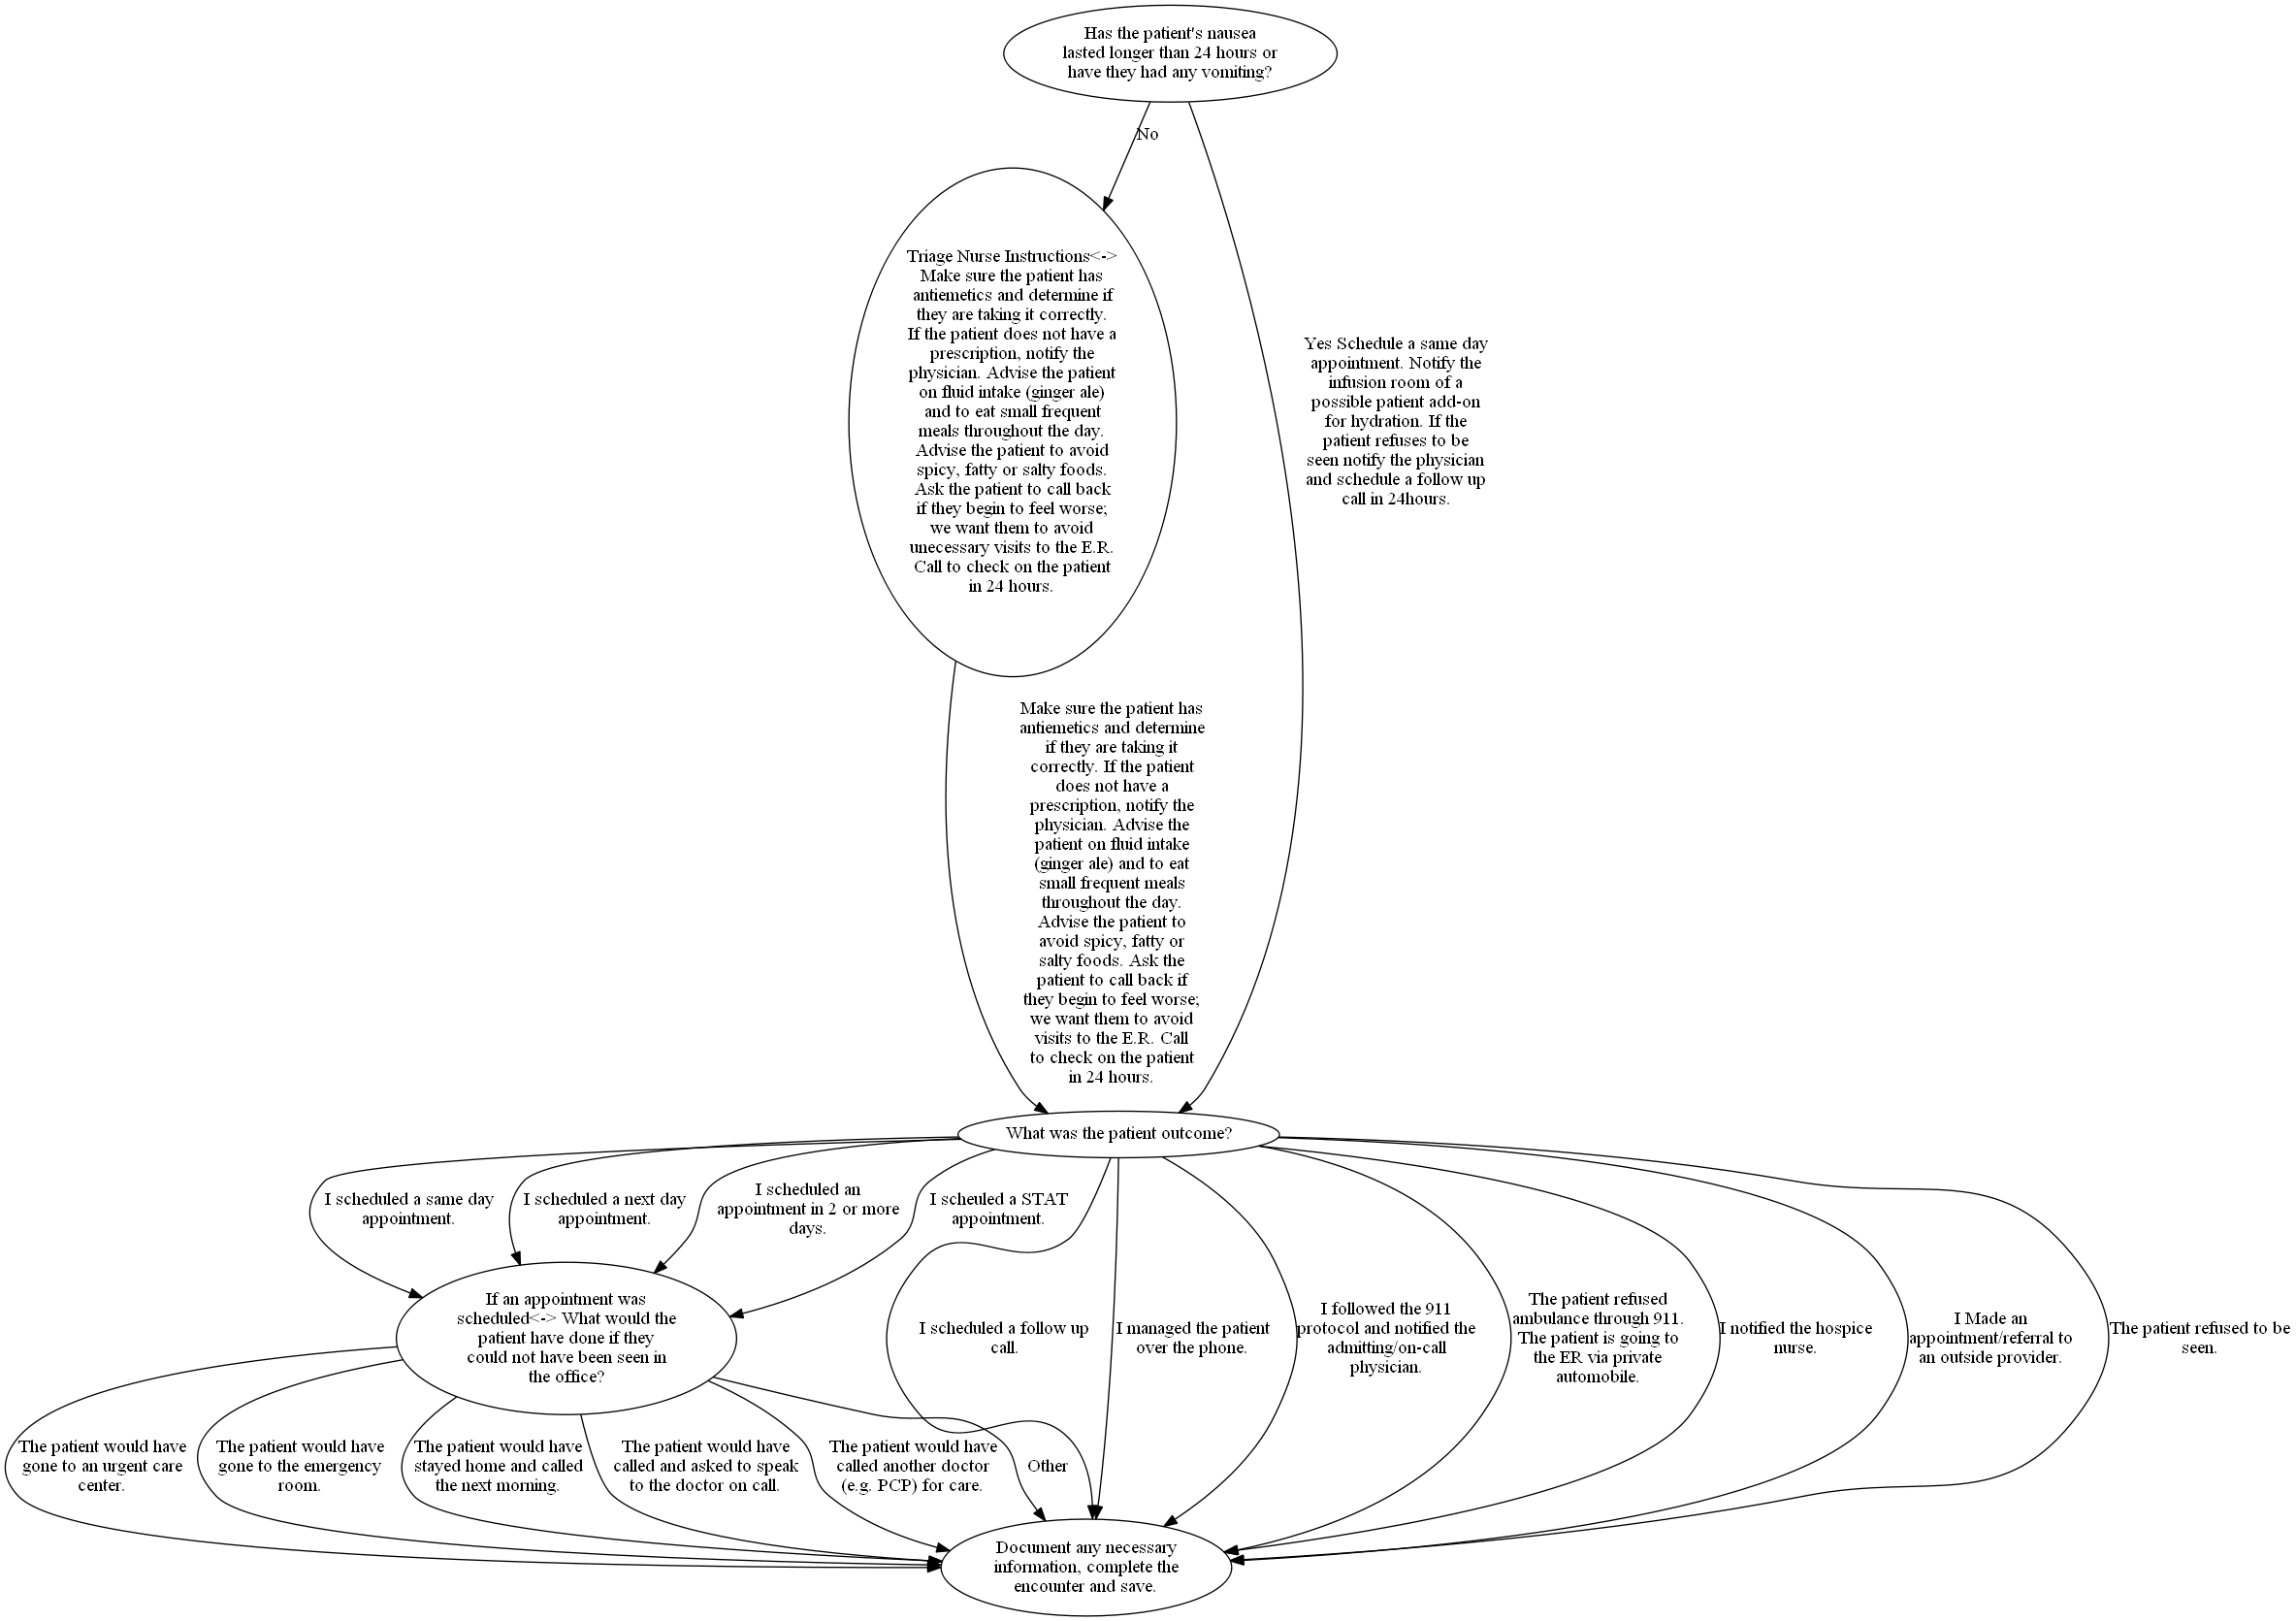

In [105]:
from IPython.display import Image
Image(filename='nauseaandvomiting.png',width=10000, height=10000)